In [11]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pandas.plotting import scatter_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn import metrics

import re
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings('ignore')


In [3]:
#Loading Data
df = pd.read_csv(r'content\UpdatedResumeDataSet.csv')

In [4]:
#Exploratory Data Analysis
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['cleaned_resume'] = ''

In [7]:
df.shape

(962, 2)

In [9]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

#There are 25 different categries in the data.Java developer, Testing, and DevOps Engineer are top 3 job categories.

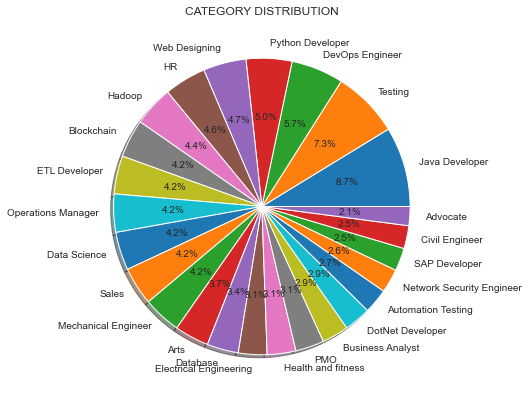

In [15]:
sns.set_style("white")
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)
plt.savefig('jobcategory_details.png')
#Pie-chart
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index
# Make square figures and axes
plt.figure(1, figsize=(25, 25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels,autopct='%1.1f%%', shadow=True, )
plt.savefig('category_dist.png')

Data Preprocessing

Step 1: Clean the ‘Resume’ column

In this step, we remove all unnecessary information from resumes like URLs, hashtags, and special characters.

In [67]:
def cleanResume(resumeText):
    # Removing character and not english.
    resumeText = re.sub(r'[^a-zA-Z0-9]+', ' ', resumeText)
    # Removing link of the message.
    resumeText = re.sub(r'http\S+', ' ', resumeText)
    resumeText = re.sub(r'https\S+', ' ', resumeText)
    # remove domain
    resumeText = re.sub('@\S+', ' ', resumeText)
    #Remove another symbols
    textresumeText = re.sub(r'[^\w]', ' ', resumeText)
    # Remove many kind of whitespace
    resumeText = re.sub(r'\s+', ' ', resumeText)
    return resumeText.lower()


df['cleaned_resume'] = df['Resume'].apply(cleanResume)

In [68]:
# NLTK word tokenize.
def word_tokenize_wrapper(resumeText):
    return word_tokenize(resumeText)

df['cleaned_resume'] = df['cleaned_resume'].apply(word_tokenize_wrapper)


In [69]:
print('Tokenizing Result : \n')
print(df['cleaned_resume'].head())
print('\n\n\n')


Tokenizing Result : 

0    [skills, programming, languages, python, panda...
1    [education, details, may, 2013, to, may, 2017,...
2    [areas, of, interest, deep, learning, control,...
3    [skills, r, python, sap, hana, tableau, sap, h...
4    [education, details, mca, ymcaust, faridabad, ...
Name: cleaned_resume, dtype: object






In [70]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
# Manualy append additional stopword.
stop_words.extend(['skills', 'programming', 'languages', "topic", "others",
                   'of', 'details', 'machine', 'learning',  'database', 'visualizations',
                   "tools",  "technologies", 'education', 'description', "areas", "of", "interest",
                   "enthusiast", "industry", "project", "name", "environment", "responsibilities",
                   'personal', 'expertise', 'company', 'computer', 'activites', 'software',
                   'strengths', 'qualification', 'additional', 'skill', 'it',
                   'sets', 'knowledge', 'title', 'location', 'drafting', 'packages',
                   'systems', 'handle', 'roles', 'competencies', 'achievement', 'attended', 'core', 'profile',
                   'linguistic', 'ability', 'passport', 'status', "skillset", 'clients', "proficiencies",
                   'technicalproficiencies', 'hobbies', 'date', "duties", "set", "os", "proficient", 'b', 'e', 'uit', 'work', 'works',
                   'technical', 'use', 'application', 'data', 'requirment', 'issues', 'issue', 'experience', 'jobs', 'job',
                   'experiences', 'include', 'using', 'used', 'various', 'like', 'activity', 'projects', 'create', 'exprience'])
# Convert list to dictionary.
stop_words = set(stop_words)
#stop_words=stop_words.update(additional_stopwords)


In [72]:
def remove_stopwords(resumeText):
    output = [i for i in resumeText if i not in stop_words]
    return output

#applying the function
df['cleaned_resume']= df['cleaned_resume'].apply(lambda x:remove_stopwords(x))

Step 2: Encoding ‘Category’

In [73]:
#Stemming and Lematization

#Stemming to get a root of every word

from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

#defining a function for stemming
def stemming(resumeText):
    stem_text = [stemmer.stem(word) for word in resumeText]
    return stem_text

df['cleaned_resume']=df['cleaned_resume'].apply(lambda x: stemming(x))

In [74]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(resumeText):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in resumeText]
    return lemm_text
df['cleaned_resume']=df['cleaned_resume'].apply(lambda x:lemmatizer(x))

In [75]:
df['cleaned_resume']

0      [python, panda, numpi, scipi, scikit, learn, m...
1      [may, 2013, may, 2017, rgpv, scientist, scient...
2      [deep, control, system, design, python, electr...
3      [r, python, sap, hana, tableau, sap, hana, sql...
4      [mca, ymcaust, faridabad, haryana, scienc, int...
                             ...                        
957    [m, offic, word, basic, excel, power, point, s...
958    [willing, accept, challeng, posit, think, good...
959    [quick, learner, eager, learn, new, thing, com...
960    [m, power, point, m, offic, c, protiu, pcb, de...
961    [window, xp, 7, 8, 8, 1, 10, mysql, sql, serve...
Name: cleaned_resume, Length: 962, dtype: object

In [76]:
test = []

for i in df['cleaned_resume']:
    test.append(",".join(i))

test = [s.replace(',', ' ') for s in test]

In [77]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()

df['Category'] = le.fit_transform(df['Category'])
df['Category']


0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

Step 3: Preprocessing ‘cleaned_resume’ column

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Initialize the TF-IDF vectorizer
requiredText = test
requiredTarget = df['Category'].values
tfidf_vectorizer = TfidfVectorizer(
    sublinear_tf=True, stop_words='english',max_features=1500, lowercase=False)

# Fit and transform the 'cleaned_resume' column
tfidf_matrix = tfidf_vectorizer.fit_transform(test)


Model Building

In [79]:
x_train,x_test,y_train,y_test = train_test_split(tfidf_matrix,requiredTarget,random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(769, 1500)
(193, 1500)


In [80]:
from sklearn import svm

In [81]:
clf = svm.SVC(decision_function_shape='ovo', kernel='linear')
clf.fit(x_train, y_train)


SVC(decision_function_shape='ovo', kernel='linear')

In [86]:
y_pred = clf.predict(x_test)

Results

In [85]:
print('Accuracy score :', clf.score(x_test, y_test))
print("Precision Score : ", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score : ", recall_score(y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score : ", f1_score(y_test, y_pred, pos_label='positive', average='micro'))


Accuracy score : 1.0
Precision Score :  1.0
Recall Score :  1.0
F1 Score :  1.0


In [87]:
clf = svm.SVC(decision_function_shape='ovo', kernel='rbf') #RBF kernel = non linear
clf.fit(x_train, y_train)
## PREDICT MODEL
y_pred = clf.predict(x_test)


In [88]:
print('Accuracy score :', clf.score(x_test, y_test))
print("Precision Score : ", precision_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score : ", recall_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score : ", f1_score(y_test, y_pred,
      pos_label='positive', average='micro'))


Accuracy score : 0.9948186528497409
Precision Score :  0.9948186528497409
Recall Score :  0.9948186528497409
F1 Score :  0.9948186528497409


In [89]:
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train, y_train)
# PREDICT MODEL
y_pred = clf.predict(x_test)


In [90]:
print('Accuracy score :', clf.score(x_test, y_test))
print("Precision Score : ", precision_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score : ", recall_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score : ", f1_score(y_test, y_pred,
      pos_label='positive', average='micro'))


Accuracy score : 0.9896373056994818
Precision Score :  0.9896373056994818
Recall Score :  0.9896373056994818
F1 Score :  0.9896373056994818


In [92]:
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsRestClassifier(RidgeClassifier())
clf.fit(x_train, y_train)
## PREDICT MODEL
y_pred = clf.predict(x_test)


In [93]:
print('Accuracy score :', clf.score(x_test, y_test))
print("Precision Score : ", precision_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score : ", recall_score(
    y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score : ", f1_score(y_test, y_pred,
      pos_label='positive', average='micro'))


Accuracy score : 0.9948186528497409
Precision Score :  0.9948186528497409
Recall Score :  0.9948186528497409
F1 Score :  0.9948186528497409


In [94]:
clf.coef_


array([[-0.01903854, -0.04060202, -0.0187664 , ..., -0.00918154,
        -0.00429324, -0.00429422],
       [-0.01500112,  0.08540553, -0.02072027, ..., -0.06088161,
         0.00229667, -0.02157327],
       [-0.01132178,  0.02613893, -0.01541993, ..., -0.01640819,
         0.02579223,  0.00089672],
       ...,
       [-0.04337422, -0.01245501, -0.00201948, ..., -0.01244702,
        -0.03298067,  0.13145904],
       [-0.0666768 ,  0.24490772, -0.08542755, ..., -0.00337258,
        -0.0281497 ,  0.01365683],
       [-0.01399771, -0.01285745, -0.01943897, ..., -0.01979806,
        -0.0074553 , -0.02130501]])